In [5]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [6]:
books = ["Genesis","Josua","LBH","EBH", "Esra","Esther", "Deuteronomium", "Chronica_I","Chronica_II", "Samuel_I", "Samuel_II", "Exodus","Judices","Reges_I","Reges_II"]

df = pd.read_csv("MC_Probabilities_"+books[0]+".csv", sep=";")
for i in range(1,len(books)):
    dfbook = pd.read_csv("MC_Probabilities_"+books[i]+".csv", sep=";")
    df = pd.merge(df,dfbook, on='Function', how="outer")
df = df.fillna(0)
df = df.set_index("Function")
df.columns = books
df

,Genesis,Josua,LBH,EBH,Esra,Esther,Deuteronomium,Chronica_I,Chronica_II,Samuel_I,Samuel_II,Exodus,Judices,Reges_I,Reges_II
Function,,,,,,,,,,,,,,,
CLAUSE-END,0.242598,0.238722,0.239572,0.240568,0.261173,0.240597,0.244799,0.246257,0.239346,0.240283,0.238729,0.238628,0.238628,0.247115,0.246088
Adju,0.012507,0.020011,0.032620,0.016255,0.055168,0.033186,0.028060,0.047478,0.041400,0.008549,0.014455,0.025056,0.012876,0.021074,0.019056
Cmpl,0.091841,0.115850,0.111765,0.090522,0.075419,0.114491,0.106434,0.081560,0.094612,0.101334,0.105338,0.083072,0.111826,0.092825,0.101338
Conj,0.191969,0.170792,0.154011,0.185531,0.129190,0.154867,0.162071,0.163318,0.169574,0.197538,0.194933,0.176585,0.193282,0.172353,0.184629
Loca,0.008890,0.009654,0.005882,0.011447,0.011872,0.006084,0.012095,0.007880,0.010046,0.006953,0.007586,0.018046,0.007558,0.009533,0.009970
Modi,0.006253,0.006319,0.004813,0.006685,0.004888,0.004425,0.004354,0.004728,0.004306,0.005585,0.007156,0.007755,0.005178,0.005645,0.004417
Nega,0.003616,0.008601,0.005882,0.004808,0.004888,0.005531,0.016449,0.003940,0.007838,0.006269,0.005439,0.008203,0.006998,0.007150,0.009465
Objc,0.068184,0.057048,0.059893,0.073306,0.069134,0.061394,0.075955,0.064421,0.074299,0.047304,0.046515,0.083520,0.056543,0.060085,0.060323
PreC,0.034129,0.051957,0.047594,0.036081,0.092877,0.046460,0.023222,0.081757,0.046699,0.037729,0.035781,0.038031,0.033310,0.051179,0.030414


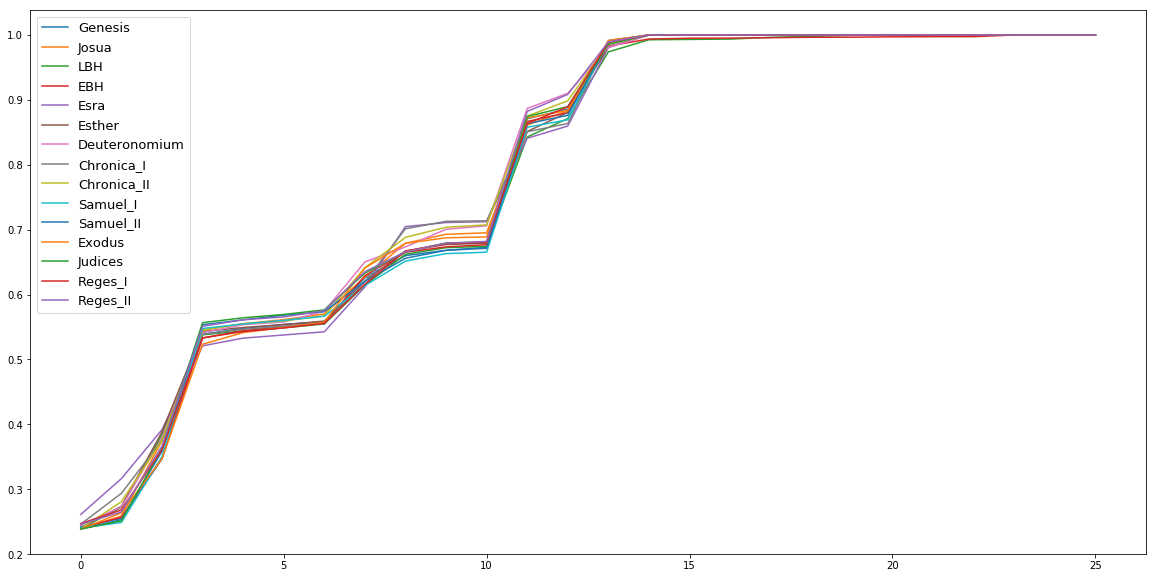

In [7]:
plt.figure(figsize= (20,10))
for column in df:
    dfCol = df[column]
    #dfCol = dfCol.sort_values(ascending=False)
    dfCol = dfCol.cumsum(0)
    plt.plot(dfCol.values, label = column)
plt.legend(loc='upper left',  prop={'size': 13})
plt.show()

In [8]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(df.values)
p



1.0

In [52]:
import sklearn.metrics

booksAmount = len(df.columns.values)
matrix = np.zeros((booksAmount,booksAmount))

for indexi,i in enumerate(df):
    for indexj,j in enumerate(df):
        if i != j and indexi>indexj:
            array1 = np.array(df[i].values).transpose()
            array2 = np.array(df[j].values).transpose()
            a = sklearn.metrics.normalized_mutual_info_score(array2,array1)
            matrix[indexi][indexj] = a

dfScore = pd.DataFrame(matrix, columns = list(df.columns.values))
dfScore["Function"] = df.columns.values
dfScore = dfScore.set_index("Function")
dfScore = np.round(dfScore, 3)
dfScore


,Genesis,Josua,LBH,EBH,Esra,Esther,Deuteronomium,Chronica_I,Chronica_II,Samuel_I,Samuel_II,Exodus,Judices,Reges_I,Reges_II
Function,,,,,,,,,,,,,,,
Genesis,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
Josua,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
LBH,0.887,0.887,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
EBH,0.854,0.854,0.895,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
Esra,0.988,0.988,0.876,0.844,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
Esther,1.000,1.000,0.887,0.854,0.988,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
Deuteronomium,0.960,0.960,0.865,0.868,0.948,0.960,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
Chronica_I,1.000,1.000,0.887,0.854,0.988,1.000,0.960,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
Chronica_II,0.972,0.972,0.876,0.878,0.961,0.972,0.989,0.972,0.000,0.000,0.000,0.0,0.0,0.0,0.0
